In [5]:
'''
Xola Ndaliso - 2019

Machine Learning project to
classify supernovae using 
lightcurves
'''

import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import sncosmo
from astropy.table import Table

def fit_supernova(lc):
    bnds = {'z':(0.01, 1.5), 't0':(-100,100),'x0':(-1e-3, 1e-3), 'x1':(-3, 3), 'c':(-0.5, 0.5)}
    mod = sncosmo.Model('salt2-extended')
    res = sncosmo.fit_lc(lc, mod, vparam_names=mod.param_names, bounds=bnds, minsnr=0)
    return res[0].parameters

### $\textit{Fitting all the 1000 lightcurves}$

file = open('salt2_params.txt', 'w')
file.write('%6s %6s %6s %6s %6s %6s %6s\n' %('#', 'i', 'z', 't0', 'x0', 'x1', 'c'))

for i in range(1000):
    lc_file = 'training_data/'+str(i)+'.dat'
    lc = Table.read(lc_file, format = 'ascii')
    prms = fit_supernova(lc)
    file.write('%4d %4.5e %4.5e %4.5e %4.5e %4.5e\n' %(i, prms[0], prms[1], prms[2], prms[3], prms[4]))

### $\textit{Question 2}$

1000


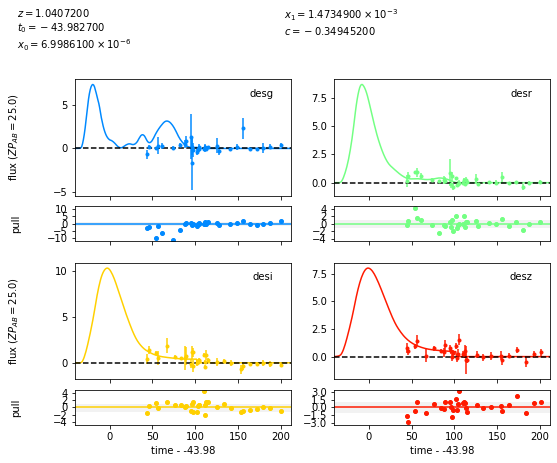

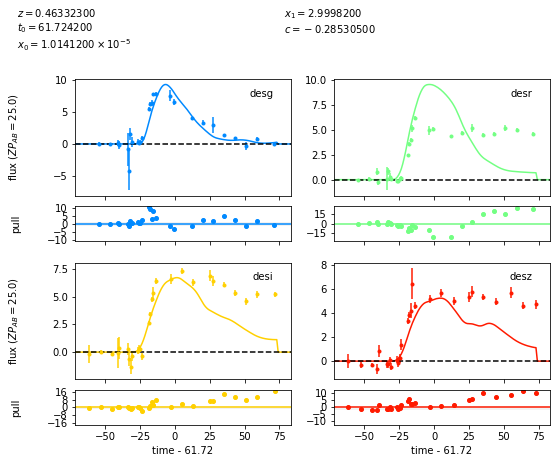

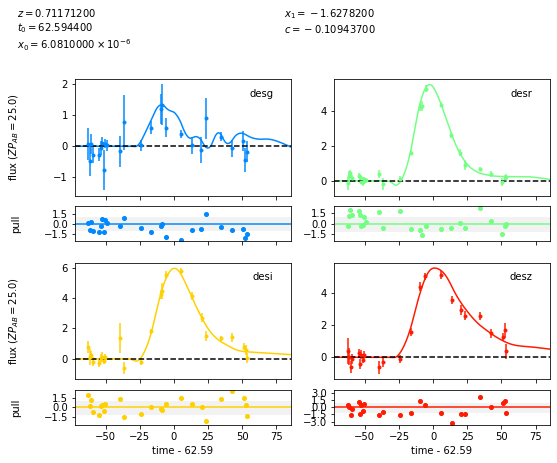

In [6]:
dat = np.loadtxt('salt2_params.txt') #reading the parameter file

print(len(dat[:,0]))

dat_files = [3, 4, 5]       #data files to analyse

for i in dat_files:
    
    prms = dat[i, 1:] 
    mod = sncosmo.Model('salt2-extended')
    mod.parameters = prms
    lc_file = 'training_data/'+str(i)+'.dat'
    lc = Table.read(lc_file, format = 'ascii')
    sncosmo.plot_lc(lc, mod)
    
    pl.savefig('plot_'+str(i)+'.eps', format = 'eps', dpi = 150)
    pl.show()

### $\textit{Question 3}$

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibD

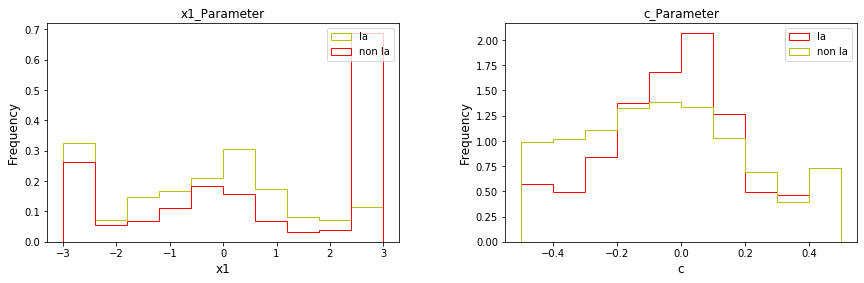

In [9]:
sup_type = np.loadtxt('training_labels.txt')
Ia_x1, Ia_c = [], []
non_Iax1, non_Iac = [], []
for i in range(len(dat[:,0])):
    
    if sup_type[i, 1] == 1:
        
        Ia_x1.append(dat[i, 4])
        Ia_c.append(dat[i, 5])
    else:
        non_Iax1.append(dat[i, 4])
        non_Iac.append(dat[i, 5])
    
pl.subplot(221, title = 'x1_Parameter')
pl.hist(Ia_x1, color = 'y', label = 'Ia', normed = True, edgecolor = 'y', fill = False, histtype = 'stepfilled')
pl.hist(non_Iax1, color = 'r', label = 'non Ia', normed = True, edgecolor = 'r', fill = False, histtype = 'stepfilled')
pl.xlabel('x1', fontsize = 12)
pl.ylabel('Frequency', fontsize = 12)
pl.legend()
pl.savefig('x1_p.eps', format = 'eps', dpi = 150)

pl.subplot(222, title = 'c_Parameter')
pl.hist(Ia_c, color = 'r', label = 'Ia', normed = True, edgecolor = 'r', fill = False, histtype = 'stepfilled')
pl.hist(non_Iac, color = 'y', label = 'non Ia', normed = True, edgecolor = 'y', fill = False, histtype = 'stepfilled')
pl.xlabel('c', fontsize = 12)
pl.ylabel('Frequency', fontsize = 12)
pl.savefig('c_p.eps', format = 'eps', dpi = 150)

pl.legend()
pl.subplots_adjust(right = 2.0, top = 1.8, wspace = 0.3)
pl.show()

## $\textit{Machine Learning via Scikit-learn}$

### $\textit{3 classifiers}$

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing


nnet = MLPClassifier()          #neural network algorithm
rf = RandomForestClassifier()   #random forest algorithm 
gnb = GaussianNB()              #Gaussian Naive Bayes algorithm 

#splittig the data into train and test
train_dat, test_dat, sup_train, sup_test = train_test_split(dat, sup_type[:,1], test_size = 0.4,
                                                           random_state = 0)
train_dat, test_dat =  preprocessing.robust_scale(train_dat), preprocessing.robust_scale(test_dat)

fit_nnet = nnet.fit(train_dat[:, 1:], sup_train) #fitting the neural network classifier
fit_rf = rf.fit(train_dat[:, 1:], sup_train)
fit_gnb = gnb.fit(train_dat[:, 1:], sup_train)

/home/xoks/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## $\textit{Evaluating the Classification}$

### $\textit{Question 5a}$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


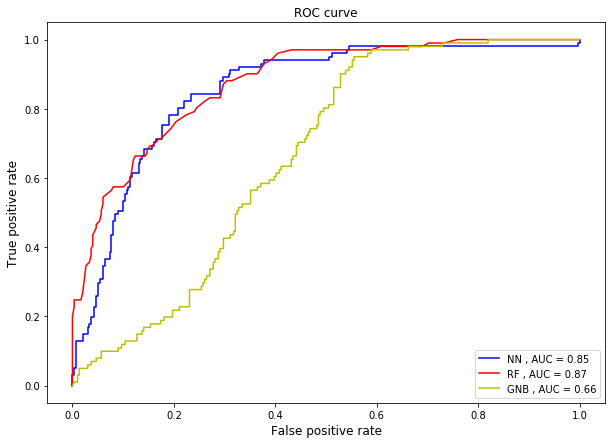

In [11]:
from sklearn import metrics
#dictionary for variables

d_var = {'clfs':[fit_nnet, fit_rf, fit_gnb], 'color':['b', 'r', 'y'],
         'label': ['NN', 'RF', 'GNB'], 'types':['Ia', 'II', 'Ibc']}  #NN - Neural Network, RF - Random Forest
                                                                     #GNB - Gaussian Naive Bayes
                                                                                                

pl.figure(figsize = (10, 7))
    
for i in range(len(d_var['clfs'])):

    scores = d_var['clfs'][i].predict_proba(test_dat[:, 1:])[:, 0]   #calculating the probabilities
    fpr, tpr, thresholds = metrics.roc_curve(sup_test, scores, pos_label = 1) #calculating true and false positives
    AUC = metrics.auc(fpr, tpr).round(2)    #rounding to two decimal places for legend
    pl.plot(fpr, tpr, c = d_var['color'][i], label = d_var['label'][i] + ' , ' + 'AUC = ' +str(AUC)) #plotting AUC 
    pl.xlabel('False positive rate', fontsize = 12)
    pl.ylabel('True positive rate', fontsize = 12)
    pl.title('ROC curve')
    pl.legend(loc = 4)
pl.savefig('ROC_curve.eps', format = 'eps', dpi = 150)
pl.show()


### $\textit{Question 5b}$

[0 1 2]


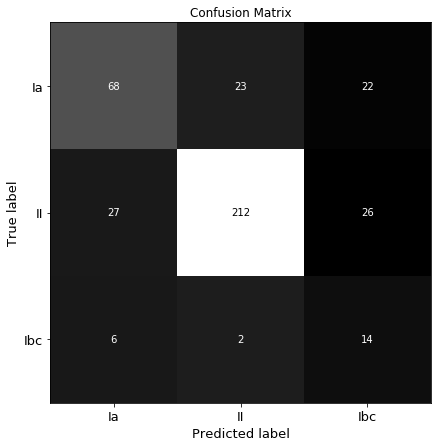

In [12]:
from sklearn.metrics import confusion_matrix

pred = fit_nnet.predict(test_dat[:, 1:])
cm = confusion_matrix(sup_test, pred)

pl.figure(figsize = (10, 7))

for i in range(len(cm[0])):           #labelling the confusion matrix
    for j in range(len(cm[1])):
        if i == 1 and j == 1:         #because that patch is white so the text must be different
            pl.text(i, j, cm[i, j], ha = 'center', va = 'center', color = 'k')
        else:
            pl.text(i, j, cm[i, j], ha = 'center', va = 'center', color = 'white')
            
pl.imshow(cm, interpolation = 'nearest', cmap = 'gray')
pl.title('Confusion Matrix')
marks = np.arange(len(d_var['types']))
print(marks)
pl.xticks(marks, d_var['types'], fontsize = 13)
pl.yticks(marks, d_var['types'], fontsize = 13)
pl.ylabel('True label', fontsize = 13)
pl.xlabel('Predicted label', fontsize = 13)
pl.savefig('confusion_matrix.eps', format = 'eps', dpi = 150)
pl.show()

## $\textit{Test Data Analysis}$

file = open('salt2_test_params.txt', 'w')
file.write('%6s %6s %6s %6s %6s %6s %6s\n' %('#', 'i', 'z', 't0', 'x0', 'x1', 'c'))

for i in range(1000):
    lc_file = 'test_data/'+str(i)+'.dat'
    lc = Table.read(lc_file, format = 'ascii')
    prms = fit_supernova(lc)
    file.write('%4d %4.5e %4.5e %4.5e %4.5e %4.5e\n' %(i, prms[0], prms[1], prms[2], prms[3], prms[4]))